In [1]:
import pandas as pd
import numpy as np

# 데이터 로드

In [2]:
df= pd.read_csv('C:/Users/Admin/Desktop/최종 프로젝트 - 로드킬 생태통로/roadkill(fin)_권4.csv', encoding = 'cp949')

# 데이터 전처리

In [3]:
df.drop(columns = '산지면적', inplace = True)

In [4]:
df.columns

Index(['발생건수', 'left', 'bottom', 'right', 'top', '졸음쉼터수', '휴게소수', '사찰수',
       'icjc수', '다리수', '주유소수', '2011교통량', '생태통로수', '농지면적', '철도수', '등고선수',
       '고라니수', '족제비수', '고양이수', '노루수', '청설모수', '오소리수', '너구리수', '멧돼지수', '두더지수',
       'AREA'],
      dtype='object')

In [5]:
df.columns = ['roadkill', 'left', 'bottom', 'right', 'top','sleep','restarea','temple','icjc','bridge','gas','traffic','sangtae'
              ,'nongji','rail','deunggo','gorani','jokjebi','cat','noru','chungsolmo','osori','nuguri','wildboar','digda','sanji']

In [6]:
## 철길유무 0, 1 더미화
df = df.fillna(0)
df.loc[df['rail'] != 0, 'rail'] = 1

In [7]:
#격자 관련 처리
df = df.drop(columns = ['left','bottom','right','top'])

In [8]:
df.astype('float')

,roadkill,sleep,restarea,temple,icjc,bridge,gas,traffic,sangtae,nongji,...,gorani,jokjebi,cat,noru,chungsolmo,osori,nuguri,wildboar,digda,sanji
0,117.0,0.0,2.0,0.0,3.0,2.0,8.0,30404.0,0.0,7.543593e+06,...,21.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,1.0,35747831.78
1,110.0,0.0,0.0,1.0,1.0,4.0,2.0,32956.0,0.0,4.372069e+06,...,32.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,1.0,39685468.51
2,103.0,0.0,0.0,1.0,3.0,6.0,3.0,4901.0,0.0,1.139921e+06,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,23404117.38
3,102.0,0.0,0.0,1.0,0.0,2.0,4.0,47709.0,0.0,7.932653e+05,...,26.0,0.0,1.0,0.0,1.0,2.0,1.0,24.0,1.0,30232536.44
4,101.0,0.0,0.0,0.0,2.0,11.0,4.0,1698.0,0.0,1.082278e+07,...,10.0,0.0,1.0,1.0,0.0,0.0,1.0,13.0,5.0,35972790.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,1.803651e+06,...,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.00
939,0.0,0.0,0.0,3.0,0.0,0.0,22.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.00
940,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.00
941,0.0,4.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.00


# 변수 스케일링

In [9]:
sns.countplot(x="roadkill", data=df)
plt.title("roadkill")
plt.show()

NameError: name 'sns' is not defined

In [ ]:
df_x = df[['sleep', 'restarea', 'temple', 'icjc', 'bridge', 'gas',
       'traffic', 'sangtae', 'nongji', 'rail', 'deunggo', 'gorani', 'jokjebi',
       'cat', 'noru', 'chungsolmo', 'osori', 'nuguri', 'wildboar', 'digda',
       'sanji']]

In [10]:
# RobustScaler(X) -> 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환. -> 아웃라이어 영향 최소화
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(df_x)
df_robust_scaled = robust_scaler.transform(df_x)
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns = df_x.columns)
df_robust_scaled = pd.concat([df_robust_scaled, df['roadkill']], axis = 1)
df = df_robust_scaled

NameError: name 'df_x' is not defined

In [ ]:
df

# 변수간 상관관계 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import font_manager, rc

In [ ]:
matplotlib.rcParams['axes.unicode_minus'] = False   
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
df1 = df.drop(columns = 'roadkill')

In [11]:
colormap = plt.cm.PuRd
plt.figure(figsize = (15,15))
plt.title('상관관계 히트맵', y = 1.1, size = 20)
sns.heatmap(df1.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0, square = True,
            fmt = '.2f',
            cmap = colormap,
            annot = True,
            linecolor = "white",
            annot_kws = {"size" : 14})


NameError: name 'plt' is not defined

In [12]:
# import pandas_profiling
# profile = df.profile_report()
# profile

In [13]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [14]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]

# 초도 모델링 : 다중선형회귀

In [15]:
# Adjusted R2 계산 함수
def Adj_r2(n,r2):
    Adj_r2 = 1-(1-r2)*(len(n)-1)/(len(n)-len(X.columns)-1)
    return Adj_r2

In [16]:
X = df[['sleep', 'restarea', 'temple', 'icjc', 'bridge', 'gas', 'traffic',
       'sangtae', 'nongji', 'rail', 'deunggo', 'gorani', 'jokjebi', 'cat',
       'noru', 'chungsolmo', 'osori', 'nuguri', 'wildboar', 'digda', 'sanji']]

y= df['roadkill']

In [17]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from statsmodels.graphics import utils
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse


In [18]:
len(X)

943

In [19]:
len(X.columns)

21

In [20]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.605    
Dependent Variable:     roadkill         AIC:                         7943.3569
Date:                   2020-08-20 08:57 BIC:                         8045.1873
No. Observations:       943              Log-Likelihood:              -3950.7  
Df Model:               21               F-statistic:                 69.88    
Df Residuals:           922              Prob (F-statistic):          4.40e-174
R-squared (uncentered): 0.614            Scale:                       260.76   
-----------------------------------------------------------------------------------
                Coef.      Std.Err.        t        P>|t|       [0.025       0.975]
-----------------------------------------------------------------------------------
sleep           1.5456       0.7726      2.0006     0.0457       0.0294      3.0619
restarea        2.3400       0.7788      3.0044 

In [21]:
input1_roadkill_mean = df['roadkill'].mean()
input1_roadkill_mean

16.058324496288442

In [22]:
from statsmodels.tools.eval_measures import rmse


 

RMSE = rmse(y, predictions)
print('RMSE :', RMSE)

RMSE : 15.967257605281619


## 아웃라이어제거 cooks distance

In [23]:
df_n

NameError: name 'df_n' is not defined

In [24]:
influence_roadkill = model.get_influence()
cooks_d2, pvals = influence_roadkill.cooks_distance
outlier_check = cooks_d2.mean()*3

In [25]:
df['cooks_d'] = cooks_d2
df_n = df[lambda x : x['cooks_d'] < outlier_check]

In [26]:
X = df_n[['sleep', 'restarea', 'temple', 'icjc', 'bridge', 'gas', 'traffic',
       'sangtae', 'nongji', 'rail', 'deunggo', 'gorani', 'jokjebi', 'cat',
       'noru', 'chungsolmo', 'osori', 'nuguri', 'wildboar', 'digda', 'sanji']]

y= df_n['roadkill']

In [27]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary2())


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.677    
Dependent Variable:     roadkill         AIC:                         6843.8263
Date:                   2020-08-20 08:57 BIC:                         6943.9164
No. Observations:       868              Log-Likelihood:              -3400.9  
Df Model:               21               F-statistic:                 87.69    
Df Residuals:           847              Prob (F-statistic):          9.02e-196
R-squared (uncentered): 0.685            Scale:                       151.84   
-----------------------------------------------------------------------------------
                Coef.      Std.Err.        t        P>|t|       [0.025       0.975]
-----------------------------------------------------------------------------------
sleep           1.9668       0.6040      3.2563     0.0012       0.7813      3.1522
restarea        1.9201       0.6310      3.0432 

In [28]:
RMSE = rmse(y, predictions)
print('RMSE :', RMSE)

RMSE : 12.172316083900817


In [29]:
df_n['roadkill'].mean()

13.361751152073733

In [30]:
df_n = df_n.drop(columns = 'cooks_d')

In [31]:
colormap = plt.cm.PuBu
plt.figure(figsize = (15,15))
plt.title('상관관계 히트맵', y = 1.1, size = 20)
sns.heatmap(df_n.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0, square = True,
            fmt = '.2f',
            cmap = colormap,
            annot = True,
            linecolor = "white",
            annot_kws = {"size" : 14})

NameError: name 'plt' is not defined

# 다중공선성 확인

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["칼럼명"] = X.columns
vif = vif.sort_values(by = ['VIF Factor'], ascending = False) #vif 클수록 다른 변수에 의존적
vif = vif.reset_index(drop = True)
vif

,VIF Factor,칼럼명
0,12.171706,gorani
1,11.699386,bridge
2,10.523809,digda
3,10.071100,deunggo
4,8.992944,icjc
5,8.515419,sanji
6,8.452171,traffic
7,6.216977,chungsolmo
8,5.915977,osori
9,5.782427,cat


In [33]:
# 일반적으로 판단하는 기준인 VIF 10 이상 변수가 없으니 제거 X

## rmse기준으로 회귀 모델의 예측 성능을 높이자

# 예측 모델1 -  릿지회귀

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3, random_state = 0)

In [36]:
ridge001 = Ridge(alpha = 0.01).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(ridge001.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(ridge001.score(xtest, ytest)))
pred = ridge001.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 
print(ridge001.coef_)
print('RMSE : ',rmse)

train 데이터 R^2 : 0.49
test 데이터 R^2 : 0.53
[ 1.73726110e+00  9.98840727e-01 -5.77040768e-01 -1.89653080e+00
 -4.05458451e-02 -1.25373540e-02  1.62128885e-04  1.34673279e+00
  9.55669070e-08 -6.01677670e+00 -1.36850288e-01  2.36833755e-01
 -2.16889897e+00 -6.32815505e+00 -2.13290069e+00 -3.01983021e+00
  1.44549748e-01  4.44064864e-01  3.81725033e+00 -3.10306063e-01
  3.79613363e-07]
RMSE :  12.606879109046417


In [37]:
ridge01 = Ridge(alpha = 0.1).fit(xtrain, ytrain) # alpha클수록 계수 0에 가까워짐.(제약 심함) -> train세트 성능은 나빠지지만 일반화는 올라감
print('train 데이터 R^2 : {:.2f}'.format(ridge01.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(ridge01.score(xtest, ytest)))
pred = ridge01.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 
print(ridge01.coef_)
print('RMSE : ',rmse)

train 데이터 R^2 : 0.49
test 데이터 R^2 : 0.53
[ 1.73669075e+00  9.98625904e-01 -5.77092729e-01 -1.89639953e+00
 -4.09665342e-02 -1.25290959e-02  1.62089958e-04  1.34558933e+00
  9.56074536e-08 -6.00370756e+00 -1.36798002e-01  2.36928040e-01
 -2.17060625e+00 -6.32373359e+00 -2.13060035e+00 -3.01804376e+00
  1.42682077e-01  4.43445244e-01  3.81689510e+00 -3.11283440e-01
  3.79529119e-07]
RMSE :  12.606581761024085


In [38]:
ridge05 = Ridge(alpha = 0.5).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(ridge05.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(ridge05.score(xtest, ytest)))
pred = ridge05.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 
print(ridge05.coef_)
print('RMSE : ',rmse)

train 데이터 R^2 : 0.49
test 데이터 R^2 : 0.53
[ 1.73415768e+00  9.97670506e-01 -5.77315488e-01 -1.89581727e+00
 -4.28203006e-02 -1.24928445e-02  1.61917136e-04  1.34049756e+00
  9.57859061e-08 -5.94640265e+00 -1.36568043e-01  2.37349500e-01
 -2.17793823e+00 -6.30418158e+00 -2.12043950e+00 -3.01013612e+00
  1.34421473e-01  4.40705812e-01  3.81531822e+00 -3.15606675e-01
  3.79158419e-07]
RMSE :  12.605277634059501


In [39]:
ridge1 = Ridge(alpha = 1).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(ridge1.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(ridge1.score(xtest, ytest)))
pred = ridge1.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 
print(ridge1.coef_)
print('RMSE : ',rmse)

train 데이터 R^2 : 0.49
test 데이터 R^2 : 0.53
[ 1.73099571e+00  9.96475020e-01 -5.77575666e-01 -1.89509214e+00
 -4.51017665e-02 -1.24485417e-02  1.61701560e-04  1.33411326e+00
  9.60050408e-08 -5.87651243e+00 -1.36286024e-01  2.37881553e-01
 -2.18653646e+00 -6.27996530e+00 -2.10788090e+00 -3.00032490e+00
  1.24187763e-01  4.37314303e-01  3.81335167e+00 -3.20963617e-01
  3.78703365e-07]
RMSE :  12.603686309105415


In [40]:
ridge = Ridge(alpha = 20).fit(xtrain, ytrain)

print('-'*100)
r2 = ridge.score(xtest, ytest)
A_r2 = Adj_r2(len(xtest),len(xtest.columns),r2)
print('모델의 Adjusted R^2 : {:.2f}'.format(A_r2))

print('-'*100)

pred = ridge.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 


print('변수별 회귀 계수 : ', ridge.coef_)
print('-'*100)
print('예측 RMSE : ',rmse)

----------------------------------------------------------------------------------------------------


TypeError: Adj_r2() takes 2 positional arguments but 3 were given

In [41]:
ridge = Ridge(alpha = 18).fit(xtrain, ytrain)
print('-'*100)
r2 = ridge.score(xtest, ytest)
A_r2 = Adj_r2(xtest, r2)
print('모델의 Adjusted R^2 : {:.2f}'.format(A_r2))
print('-'*100)
pred = ridge.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 
print('변수별 회귀 계수 : ', ridge.coef_)
print('-'*100)
print('예측 RMSE : ',rmse)

----------------------------------------------------------------------------------------------------
모델의 Adjusted R^2 : 0.49
----------------------------------------------------------------------------------------------------
변수별 회귀 계수 :  [ 1.62764631e+00  9.56412280e-01 -5.78373189e-01 -1.87240568e+00
 -1.06247077e-01 -1.14107995e-02  1.54775573e-04  1.12242282e+00
  1.01638325e-07 -4.25923357e+00 -1.29208170e-01  2.57157412e-01
 -2.25987926e+00 -5.57482727e+00 -1.75719697e+00 -2.70920107e+00
 -1.67420557e-01  3.40019236e-01  3.75006249e+00 -4.75842032e-01
  3.67080041e-07]
----------------------------------------------------------------------------------------------------
예측 RMSE :  12.567076342142965


In [42]:
df_n['roadkill'].mean()

13.361751152073733

# 예측 모델 - 2. 라쏘회귀

In [43]:
from sklearn.linear_model import Lasso
lasso0001 = Lasso(alpha = 0.001,max_iter = 100000).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(lasso0001.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(lasso0001.score(xtest, ytest)))
print(lasso0001.coef_)

train 데이터 R^2 : 0.49
test 데이터 R^2 : 0.53
[ 1.73496642e+00  9.96548272e-01 -5.76147017e-01 -1.89635062e+00
 -4.08114834e-02 -1.25509838e-02  1.62085721e-04  1.34143354e+00
  9.56166132e-08 -6.00712086e+00 -1.36833721e-01  2.37071239e-01
 -2.16300463e+00 -6.32391560e+00 -2.12533251e+00 -3.01572607e+00
  1.37864975e-01  4.41927620e-01  3.81676908e+00 -3.10347960e-01
  3.79422955e-07]


In [44]:
lasso01 = Lasso(alpha = 0.1,max_iter = 100000).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(lasso01.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(lasso01.score(xtest, ytest)))
print(lasso01.coef_)

train 데이터 R^2 : 0.49
test 데이터 R^2 : 0.54
[ 1.51176450e+00  7.87903274e-01 -5.04298794e-01 -1.91432994e+00
 -7.03987466e-02 -1.32229758e-02  1.57311093e-04  7.28276836e-01
  1.00070622e-07 -4.87381307e+00 -1.38339009e-01  2.36602708e-01
 -1.65439446e+00 -6.02942006e+00 -1.37063821e+00 -2.72516165e+00
 -0.00000000e+00  1.96142131e-01  3.78444642e+00 -3.42511476e-01
  3.66194808e-07]


In [45]:
lasso05 = Lasso(alpha = 0.5,max_iter = 100000).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(lasso05.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(lasso05.score(xtest, ytest)))
print(lasso05.coef_)

train 데이터 R^2 : 0.46
test 데이터 R^2 : 0.53
[ 5.95887442e-01  0.00000000e+00 -1.22250816e-01 -2.01599717e+00
 -2.46025226e-01 -2.68259029e-02  1.31991929e-04  0.00000000e+00
  1.22899526e-07 -1.65068778e-01 -1.16150432e-01  1.49124938e-01
 -4.53758322e-01 -5.05458635e+00 -0.00000000e+00 -2.04998623e+00
 -0.00000000e+00 -0.00000000e+00  3.71333984e+00 -3.70224932e-01
  3.39490360e-07]


In [46]:
lasso1 = Lasso(alpha = 1,max_iter = 100000).fit(xtrain, ytrain)
print('train 데이터 R^2 : {:.2f}'.format(lasso1.score(xtrain, ytrain)))
print('test 데이터 R^2 : {:.2f}'.format(lasso1.score(xtest, ytest)))
print(lasso1.coef_)

train 데이터 R^2 : 0.44
test 데이터 R^2 : 0.52
[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.01595743e+00
 -3.43932764e-01 -1.89202487e-02  9.35952991e-05 -0.00000000e+00
  1.38392289e-07 -0.00000000e+00 -1.05122899e-01  5.19410206e-02
 -0.00000000e+00 -3.34894291e+00 -0.00000000e+00 -9.40935144e-01
 -0.00000000e+00 -0.00000000e+00  3.58780347e+00 -2.46400044e-01
  3.26583862e-07]


In [47]:
lasso = Lasso(alpha = 0.25,max_iter = 10000).fit(xtrain, ytrain)
print('-'*100)
r2 = lasso.score(xtest, ytest)
A_r2 = Adj_r2(xtest, r2)
print('모델의 Adjusted R^2 : {:.2f}'.format(A_r2))
print('-'*100)
pred = lasso.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,pred)) 
print('변수별 회귀 계수 : ', lasso.coef_)
print('-'*100)
print('예측 RMSE : ',rmse)

----------------------------------------------------------------------------------------------------
모델의 Adjusted R^2 : 0.49
----------------------------------------------------------------------------------------------------
변수별 회귀 계수 :  [ 1.17126293e+00  4.80581225e-01 -3.86553901e-01 -1.95279578e+00
 -1.16678985e-01 -1.71797431e-02  1.48950652e-04  0.00000000e+00
  1.08752164e-07 -3.14021421e+00 -1.33800482e-01  2.15032273e-01
 -1.03696175e+00 -5.65989512e+00 -4.97993625e-01 -2.39138166e+00
 -0.00000000e+00  0.00000000e+00  3.74864067e+00 -3.85354956e-01
  3.52906874e-07]
----------------------------------------------------------------------------------------------------
예측 RMSE :  12.565480924059312


# 예측 모델 - 3. Decision Tree

In [48]:
# Adjusted R2 계산 함수
def Adj_r2(r2):
    Adj_r2 = 1-(1-r2)*(len(df_n)-1)/(len(df_n)-len(X.columns)-1)
    return Adj_r2

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# Before fitting regression model, find optimal parameters of model.

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(2, 20, 2), 'random_state':[0]}
dt_reg = DecisionTreeRegressor(random_state = 0)
grid_search = GridSearchCV(dt_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2), 'random_state': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', ver

In [52]:
print(grid_search.best_params_)

{'max_depth': 4, 'random_state': 0}


In [53]:
best_estim=grid_search.best_estimator_
print(best_estim)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [54]:
# 따라서 최적의 모델은
tree_reg = best_estim

In [55]:
tree_reg.fit(xtrain, ytrain)

# K-fold - decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True) # K-fold 5개로 분할

scores = cross_val_score(tree_reg, xtrain, ytrain, cv=kfold, scoring = 'neg_mean_squared_error')
kf_cv_scores = -scores
kf_cv_scores = np.sqrt(kf_cv_scores)
kf_cv_scores = kf_cv_scores.mean()
print("K-fold CV average score (by RMSE): %.2f" % kf_cv_scores)


K-fold CV average score (by RMSE): 13.09


In [56]:
# hold-out(test셋에) 대해 prediction
from sklearn.metrics import r2_score
ypred = tree_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
r2 = r2_score(ytest, ypred)
A_r2 = Adj_r2(len(X),len(X.columns),r2)



print("Adjusted R^2: %.2f" % A_r2)
print("RMSE: %.2f" % np.sqrt(mse))

TypeError: Adj_r2() takes 1 positional argument but 3 were given

In [57]:
input5_dt_rmse = 0.28
input5_dt_Ar2 = 15.17

In [58]:
#피처 중요도 도표 그리기
featureImportance = tree_reg.feature_importances_
 
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, X.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.rcParams["figure.figsize"] = (13,27)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'b'
plt.title('Feature importance of Decision Tree Regressor')
plt.savefig('Feature importance of Decision Tree Regressor', bbox_inches ='tight', dpi = 300,facecolor='#eeeeee')

NameError: name 'plt' is not defined

# 예측 모델 - 4. 랜덤포레스트

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

In [69]:
mseOos = []
nTreeList = range(10, 200, 5)
for iTrees in nTreeList:
    depth = None
    rf_reg = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth,
                    oob_score=False, random_state=0)
    rf_reg.fit(xtrain, ytrain)
    #데이터 세트에 대한 MSE 누적
    prediction = rf_reg.predict(xtest)
    mseOos.append(mean_squared_error(ytest, prediction))

In [70]:
rmseOos = np.sqrt(mseOos)
rmseOos

array([11.06286114, 10.8455365 , 10.70662594, 10.60930438, 10.62715603,
       10.64827981, 10.6185094 , 10.60649206, 10.48333726, 10.49562363,
       10.4859921 , 10.50402323, 10.53416798, 10.55529605, 10.53555619,
       10.52188358, 10.52727737, 10.50548223, 10.46725908, 10.44708127,
       10.43380322, 10.42029814, 10.43288383, 10.45431586, 10.48099242,
       10.48864567, 10.49274261, 10.48413052, 10.482187  , 10.49230757,
       10.51559715, 10.51406911, 10.52783714, 10.50721859, 10.51264168,
       10.50732923, 10.48868569, 10.48267074])

In [71]:
import matplotlib.pyplot as plt

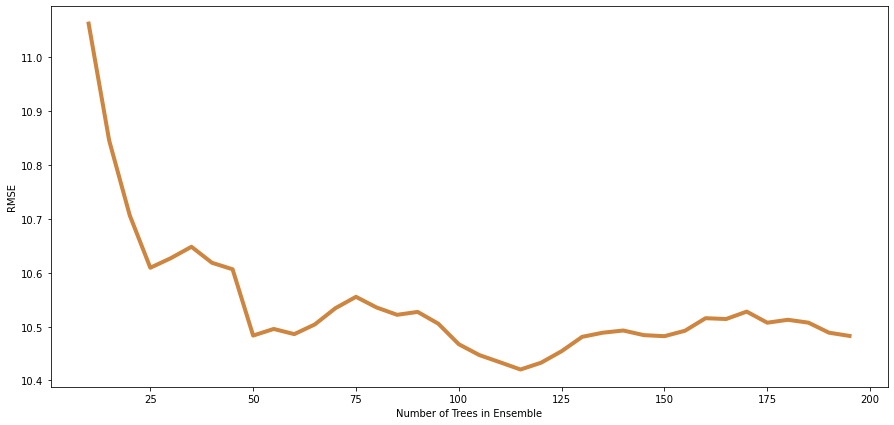

In [72]:
#트레이닝 테스트 오차 대비  앙상블의 트리 개수 도표 그리기
plt.rcParams["figure.figsize"] = (15,7)
plot.plot(nTreeList, rmseOos, color = 'peru')
plt.rcParams['lines.linewidth'] = 4
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('RMSE')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.savefig('Number of Trees in Ensemble', bbox_inches ='tight', dpi = 300,facecolor='#eeeeee')

In [73]:
Tree_number = list(nTreeList)
dd = {'NumberOfTree' : Tree_number, 'RMSE' : rmseOos}
N_of_Tree = pd.DataFrame(dd)

In [74]:
N_of_Tree.set_index('NumberOfTree',inplace = True)
N_of_Tree.sort_values(by = 'RMSE')

,RMSE
NumberOfTree,
115,10.420298
120,10.432884
110,10.433803
105,10.447081
125,10.454316
100,10.467259
130,10.480992
150,10.482187
195,10.482671


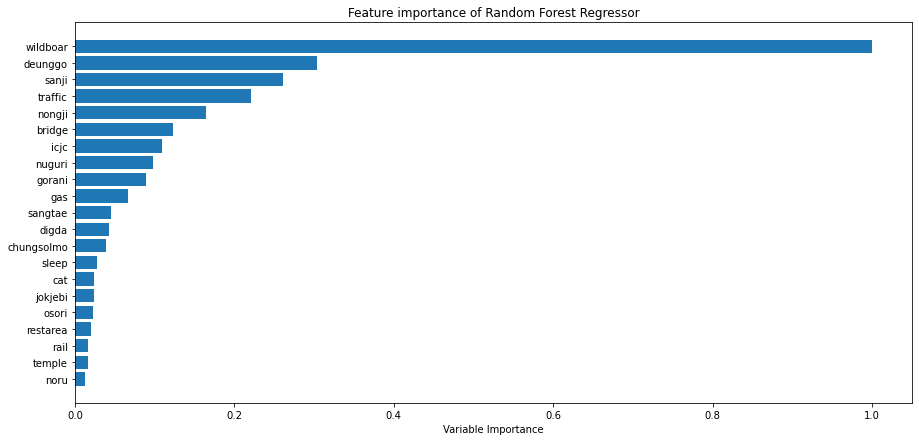

In [75]:
#피처 중요도 도표 그리기
featureImportance = rf_reg.feature_importances_
 
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, X.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.rcParams["figure.figsize"] = (13,27)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'b'
plt.title('Feature importance of Random Forest Regressor')
plt.savefig('Feature importance of Random Forest Regressor', bbox_inches ='tight', dpi = 300,facecolor='#eeeeee')

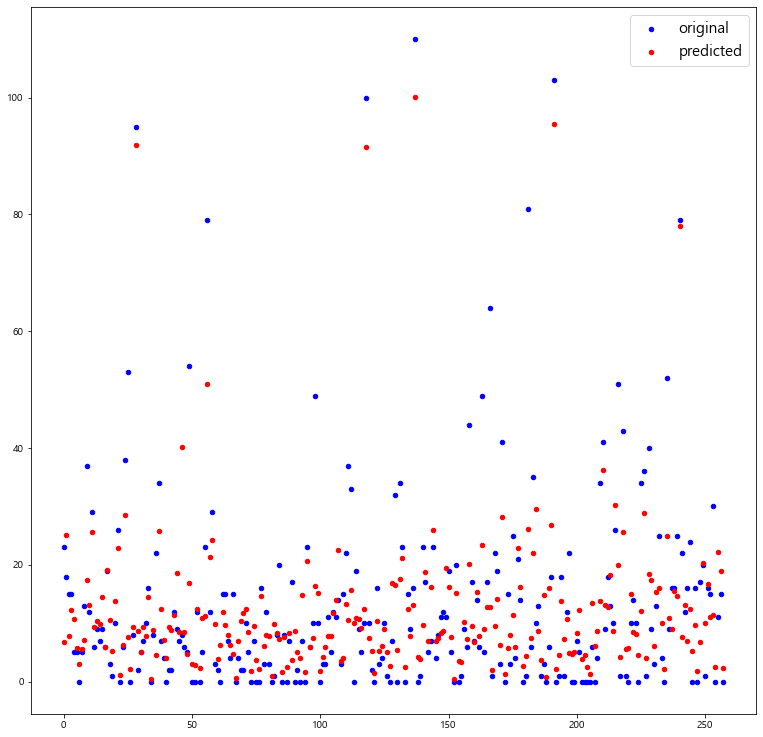

In [642]:
x_ax = range(len(ytest))
plt.rcParams["figure.figsize"] = (13,13)
plt.scatter(x_ax, ytest, s = 20, color="blue", label="original")
plt.scatter(x_ax, prediction, s=20, color="red", label="predicted")
plt.legend(prop={'size': 15})
plt.savefig('Prediction in Random Forest Regressor', bbox_inches ='tight', dpi = 300,facecolor='#eeeeee')

In [77]:
# 따라서 최적의 모델은
RandomForest_reg = RandomForestRegressor(n_estimators = 115, random_state = 0)
RandomForest_reg.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=115, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [78]:
preds = RandomForest_reg.predict(xtrain)

RMSE = np.mean((preds - ytrain)**2)**(1/2) # Ensemble 

print('train 데이터의 RMSE : ', RMSE)

train 데이터의 RMSE :  3.784497411321656


In [79]:
preds = RandomForest_reg.predict(xtest)

RMSE = np.mean((preds - ytest)**2)**(1/2) # Ensemble 

print('test 데이터의 RMSE : ', RMSE)

test 데이터의 RMSE :  10.420298140217282


In [80]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean of RMSE:", scores.mean())
    print("Standard deviation:", scores.std())

In [81]:
# CV fold - Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True) # K-fold 5개로 분할

scores = cross_val_score(RandomForest_reg, xtrain, ytrain, cv=kfold, scoring = 'neg_mean_squared_error')
kf_cv_scores = -scores
kf_cv_scores = np.sqrt(kf_cv_scores)
kf_cv_scores = kf_cv_scores.mean()
print("K-fold CV average score (by RMSE): %.2f" % kf_cv_scores)


K-fold CV average score (by RMSE): 10.01


In [82]:
# Adjusted R2 계산 함수
def Adj_r2(n,p,r2):
    Adj_r2 = 1-(1-r2)*(len(df_n)-1)/(len(df_n)-len(X.columns)-1)
    return Adj_r2

In [83]:
# Adjusted R2 계산 함수
def Adj_r2(n,r2):
    Adj_r2 = 1-(1-r2)*(len(n)-1)/(len(n)-len(X.columns)-1)
    return Adj_r2

In [84]:
# prediction 및 score
from sklearn.metrics import r2_score

r2 = r2_score(ytest, ypred)
A_r2 = Adj_r2(xtest, r2)

ypred = RandomForest_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)

print("모델의 Adjusted R^2: %.2f" % A_r2)
print("예측 RMSE: %.2f" % np.sqrt(mse))

모델의 Adjusted R^2: 0.33
예측 RMSE: 10.42


# 예측 모델 - 5. LightGBM

In [38]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from tqdm import tqdm

In [693]:
#그리드 서치

In [694]:
lgbm_reg = LGBMRegressor(random_state = 0)
param_grid = {'learning_rate' :[0.005,0.01,0.025,0.05,0.1,0.25,0.35,0.5], 'n_estimators' : np.arange(20,300,20)
             , 'num_iterations' : np.arange(1000, 2000, 300), 'max_depth' : np.arange(3,12,1),
              'boosting' : ['gbdt'], 'random_state' : [0]}

grid_search = GridSearchCV(lgbm_reg, param_grid, cv=5,
                           return_train_score=True, scoring = 'neg_mean_squared_error',verbose=10, n_jobs = -1)

grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 9506 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 9645 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 9925 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 10066 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 10209 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 10497 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 10642 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 10789 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 10936 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 11085 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 11385 tasks      |

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=0,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     su...
             param_grid={'boosting': ['gbdt'],
                         'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.1, 0.25,
                                           0.35, 0.5],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([ 20, 

In [742]:
print(grid_search.best_params_) # 최적의 파라미터 값 출력

{'boosting': 'gbdt', 'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 20, 'num_iterations': 1600, 'random_state': 0}


In [743]:
best_estim=grid_search.best_estimator_

In [744]:
# 따라서 최적의 모형은
lgbm_reg = best_estim
lgbm_reg

LGBMRegressor(boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.25,
              max_depth=4, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=20, n_jobs=-1,
              num_iterations=1600, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [698]:
lgbm_reg.fit(xtrain, ytrain)

# K-fold - decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

KFold = KFold(n_splits=10, shuffle=True)


kf_cv_scores = cross_val_score(lgbm_reg, xtrain, ytrain, cv=KFold, scoring = 'neg_mean_squared_error')
kf_cv_scores = np.sqrt(-kf_cv_scores).mean()

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: U

In [727]:
print("K-fold CV average score: %.2f" % kf_cv_scores)

K-fold CV average score: 10.20


In [745]:
# prediction 및 score
from sklearn.metrics import r2_score
ypred = lgbm_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
r2 = r2_score(ytest, ypred)
A_r2 = Adj_r2(xtest,r2)

print("모델의 Adjusted R^2: %.2f" % A_r2)
print("예측 RMSE: %.2f" % np.sqrt(mse))

모델의 Adjusted R^2: 0.68
예측 RMSE: 9.81


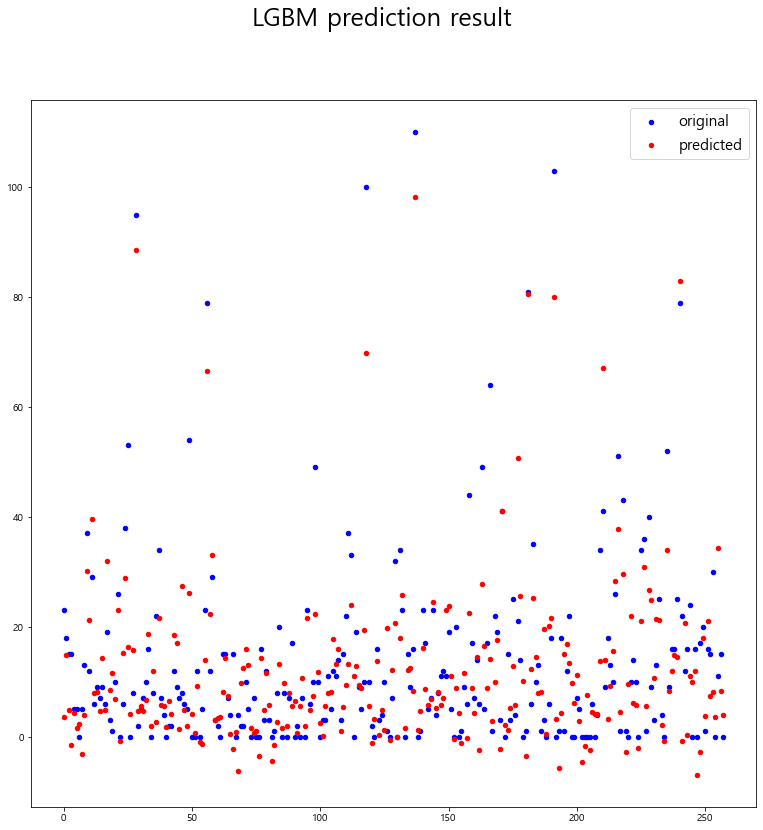

In [746]:
x_ax = range(len(ytest))
plt.rcParams["figure.figsize"] = (13,13)
plt.scatter(x_ax, ytest, s=20, color="blue", label="original")
plt.scatter(x_ax, ypred, s=20, color="red", label="predicted")
plt.legend(prop={'size': 15})
plt.suptitle('LGBM prediction result', fontsize=25)
plt.savefig('LGBM prediction result', bbox_inches ='tight', dpi = 300,facecolor='#eeeeee')

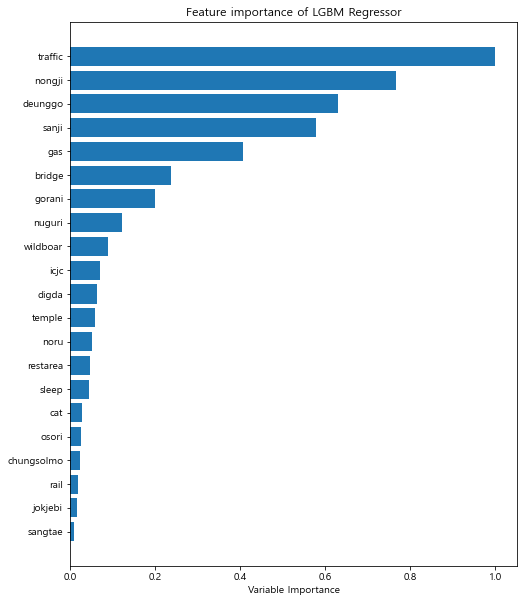

In [752]:
#피처 중요도 도표 그리기
featureImportance = lgbm_reg.feature_importances_
 
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, X.columns[sorted_idx])
plot.xlabel('Variable Importance')
plt.rcParams["figure.figsize"] = (8,10)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'b'
plt.title('Feature importance of LGBM Regressor')
plt.savefig('Feature importance of LGBM Regressor', bbox_inches ='tight', dpi = 300,facecolor='#eeeeee')

In [733]:
# 베이지안 옵티마이제이션

In [36]:
from lightgbm import Dataset
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, mean_squared_error

In [735]:
dtrain = lgb.Dataset(xtrain, label= ytrain)
dtest = lgb.Dataset(xtest, label= ytest)

In [736]:
def lgb_eval(max_depth,  learning_rate, num_iterations,feature_fraction,scale_pos_weight):
    params = {"objective" : "regression",
              "max_depth": int(round(max_depth)),
              'learning_rate' :  learning_rate,
              'num_iterations' : int(round(num_iterations)),
              'feature_fraction' : feature_fraction,
              'scale_pos_weight' : scale_pos_weight,
              "metric" : 'rmse'
            }
    
    cv_result = lgb.cv(params, dtrain, nfold=5, num_boost_round=100)
    return (-1.0 * np.array(cv_result['rmse-mean'])).max()

In [737]:
import sys

In [738]:
lgbBO = BayesianOptimization(lgb_eval, {'max_depth': (3,12),
                                        'learning_rate' : (0.001,0.5),
                                        'num_iterations': (1000, 3000),
                                        'feature_fraction': (0.6, 1.0),
                                        'scale_pos_weight' : (1.0, 1.5)}, random_state=0)

In [739]:
lgbBO.maximize(init_points=3, n_iter=10, acq='ei')

|   iter    |  target   | featur... | learni... | max_depth | num_it... | scale_... |
-------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  1        | -11.45    |  0.8195   |  0.3579   |  8.425    |  2.09e+03 |  1.212    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  2        | -11.33    |  0.8584   |  0.2194   |  11.03    |  2.927e+0 |  1.192    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  3        | -11.07    |  0.9167   |  0.2649   |  8.112    |  2.851e+0 |  1.036    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  4        | -11.48    |  1.0      |  0.5      |  3.0      |  2.587e+0 |  1.0      |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  5        | -11.48    |  1.0      |  0.5      |  3.0      |  1e+03    |  1.5      |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  6        | -13.66    |  0.7936   |  0.001    |  12.0     |  1.573e+0 |  1.0      |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  7        | -12.97    |  0.6      |  0.001    |  12.0     |  2.299e+0 |  1.334    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  8        | -11.06    |  0.7979   |  0.006497 |  4.422    |  2.853e+0 |  1.467    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  9        | -13.36    |  0.6      |  0.001    |  3.0      |  2.738e+0 |  1.5      |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  10       | -10.97    |  0.6925   |  0.04252  |  11.97    |  2.879e+0 |  1.114    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  11       | -10.59    |  0.7586   |  0.1066   |  3.643    |  1.971e+0 |  1.041    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  12       | -11.13    |  0.6379   |  0.2275   |  11.72    |  1.91e+03 |  1.226    |


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


|  13       | -11.86    |  1.0      |  0.5      |  12.0     |  2.005e+0 |  1.5      |


In [740]:
best_params = lgbBO.max['params'] # 최적의 파라미터
best_params['max_depth'] = int(best_params['max_depth'])
best_params['num_iterations'] = int(best_params['num_iterations'])
best_params

{'feature_fraction': 0.7585669039285498,
 'learning_rate': 0.10658808443042225,
 'max_depth': 3,
 'num_iterations': 1971,
 'scale_pos_weight': 1.041278172221918}

In [741]:
model2 = lgb.train(best_params, dtrain, num_boost_round=250)

# Predict on testing and training set
y_pred = model2.predict(xtest)
y_train_pred = model2.predict(xtrain)

# Report testing and training RMSE

# print('train 데이터 예측 rmse :', np.sqrt(mean_squared_error(ytrain, y_train_pred)))
print('hold-out(test 데이터) 예측 rmse :', np.sqrt(mean_squared_error(ytest, y_pred))) #오버피팅이 심함

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


train 데이터 예측 rmse : 1.2161844563000086
hold-out(test 데이터) 예측 rmse : 10.019061956715134


In [ ]:
y

# 예측 모델 - 6. XGB

In [31]:
# 관리자 모드로 cmd 열어서 =>      conda install -c conda-forge/label/cf202003 bayesian-optimization

In [32]:
### 베이지안 최적화

In [41]:
from xgboost import XGBRegressor
import xgboost as xgb
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings('ignore')

In [42]:
# 그리드 서치

In [43]:
xgb_reg = xgb.XGBRegressor(random_state = 0) # eta : learning rate, lambda : L2 regularization, alpha : L1 regularization
param_grid = {'eta' : [0.001,0.005,0.01,0.02, 0.25,0.3,0.035], 'n_estimators' : np.arange(20,200,5),
              'max_depth' : np.arange(3,12,1), 'gamma':[0,1,2]}

grid_search = GridSearchCV(xgb_reg, param_grid, cv=5,
    return_train_score=True, scoring = 'neg_mean_squared_error',verbose=10,n_jobs = -1)

grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 6804 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1944s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 274 tas

[Parallel(n_jobs=-1)]: Done 9237 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 9370 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 9505 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 9640 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 9777 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 9914 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 10053 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 10192 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 10333 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 10474 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 10617 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 10760 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 10905 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 11050 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 11197 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 11344 tasks      |

[Parallel(n_jobs=-1)]: Done 32329 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 32578 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 32829 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 33080 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 33333 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 33586 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 33841 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 34020 out of 34020 | elapsed: 31.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
             param_grid={'eta': [0.001, 0.005, 0.01, 0.02, 0.25, 0.3, 0.035],
                         'gamma': [0, 1, 2],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([ 20,  25,  30,  35,  40,  45,  50,  55

In [801]:
print(grid_search.best_params_)


{'eta': 0.25, 'gamma': 1, 'max_depth': 3, 'n_estimators': 195}


In [802]:
best_estim=grid_search.best_estimator_

In [803]:
# 따라서 최적의 모형은
xgb_reg = best_estim
xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.25, gamma=1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=195, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [817]:
xgb_reg.fit(xtrain, ytrain)

# K-fold - decision tree
# kfold = KFold(n_splits=10, shuffle=True)

kf_cv_scores = cross_val_score(xgb_reg, xtrain, ytrain, cv=10, scoring = 'neg_mean_squared_error')
kf_cv_scores = np.sqrt(-kf_cv_scores).mean()

In [818]:
print("K-fold CV average score: %.2f" % kf_cv_scores)

K-fold CV average score: 10.16


In [819]:
# prediction 및 score
from sklearn.metrics import r2_score
ypred = xgb_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
r2 = r2_score(ytest, ypred)
A_r2 = Adj_r2(xtest,r2)

print("모델 Adjusted R^2: %.2f" % A_r2)
print("예측 RMSE: %.2f" % np.sqrt(mse))

모델 Adjusted R^2: 0.65
예측 RMSE: 10.17


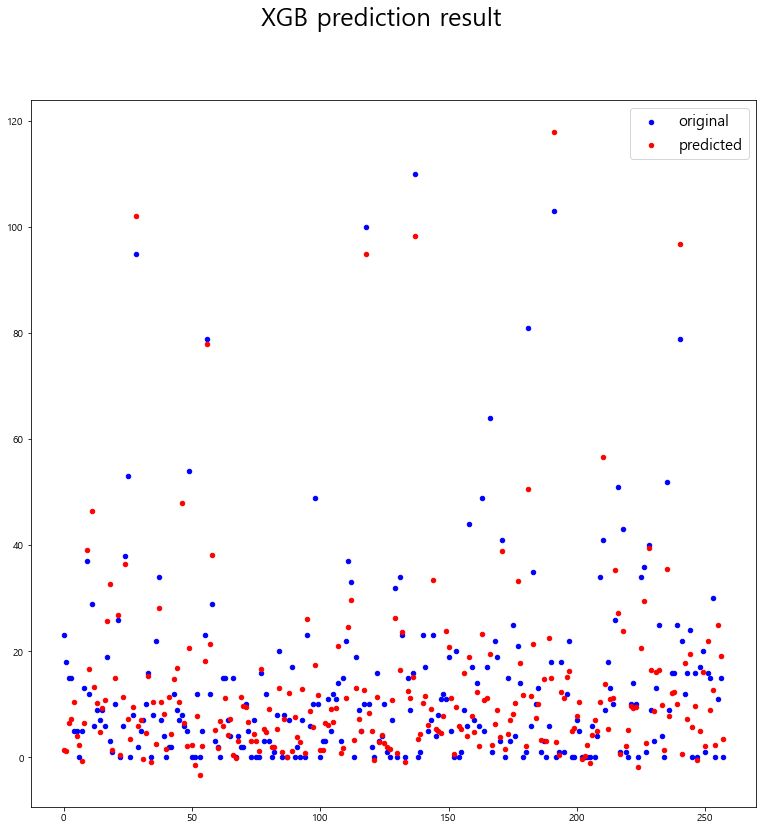

In [326]:
x_ax = range(len(ytest))
plt.rcParams["figure.figsize"] = (13,13)
plt.scatter(x_ax, ytest, s=20, color="blue", label="original")
plt.scatter(x_ax, ypred, s=20, color="red", label="predicted")
plt.legend(prop={'size': 15})
plt.suptitle('XGB prediction result', fontsize=25)
plt.show()

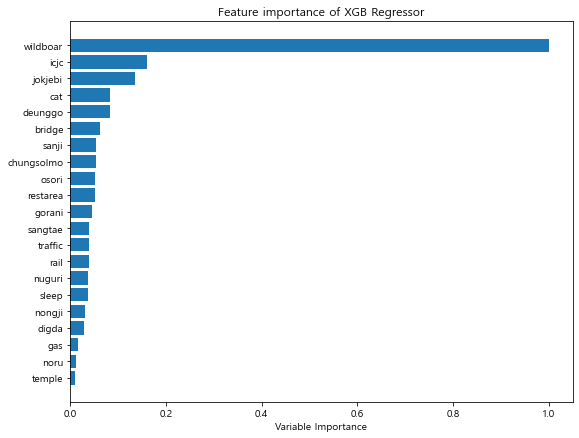

In [778]:
#피처 중요도 도표 그리기
featureImportance = xgb_reg.feature_importances_
 
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, X.columns[sorted_idx])
plot.xlabel('Variable Importance')
plt.rcParams["figure.figsize"] = (9,7)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'b'
plt.title('Feature importance of XGB Regressor')
plot.show()

In [ ]:
# 베이지안 옵티마이제이션

In [780]:
dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest)

In [781]:
def xgb_evaluate(max_depth, gamma, subsample, colsample_bytree, eta, min_child_weight, n_estimators, nrounds):
    params = {'eval_metric': 'rmse',
              'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
             'random_state' : 0,
             'min_child_weight' : min_child_weight,
              'n_estimators' : n_estimators,
             'nrounds': int(round(nrounds))}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [782]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3,10), 
                                             'gamma': (0, 2),
                                             'subsample': (0.5, 1.0),
                                             'colsample_bytree': (0.3, 1.0),
                                             'eta' : (0.001, 0.35),
                                             'min_child_weight' : (1.0,1.3),
                                            'n_estimators' : (20,300),
                                              'nrounds' :  (1000,2000) 
                                            })
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=10, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |  nrounds  | subsample |
-------------------------------------------------------------------------------------------------------------------------
[13:03:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please

|  4        | -11.31    |  0.5858   |  0.3143   |  1.311    |  9.437    |  1.186    |  232.5    |  1.282e+0 |  0.6576   |
[13:03:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0

|  8        | -10.54    |  0.3604   |  0.2065   |  0.6213   |  5.386    |  1.209    |  234.2    |  1.282e+0 |  0.526    |
[13:03:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0

|  12       | -10.49    |  0.7108   |  0.2498   |  0.5694   |  5.991    |  1.115    |  34.77    |  1.797e+0 |  0.8357   |
[13:03:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0

In [783]:
# best_params = xgb_bo.max['params'] # 최적의 파라미터
# best_params['max_depth'] = int(best_params['max_depth'])
# best_params

In [784]:
best_params1 = xgb_bo.max['params']
best_params1['max_depth'] = int(best_params1['max_depth'])
best_params1['nrounds'] = int(best_params1['nrounds'])
best_params1['n_estimators'] =  int(best_params1['n_estimators'])
best_params1

{'colsample_bytree': 0.6705789588531197,
 'eta': 0.12982248072664607,
 'gamma': 0.30434502504053595,
 'max_depth': 7,
 'min_child_weight': 1.1210161101649359,
 'n_estimators': 233,
 'nrounds': 1285,
 'subsample': 0.7447761521797485}

In [785]:
# input7_lgb_rmse = 0.70
# input7_lgb_Ar2 = 9.59

In [788]:

best_model = xgb.train(best_params1, dtrain, num_boost_round=250)
model2 = best_model

[13:04:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [790]:
# Predict on testing and training set
y_pred =model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE

print('train 데이터 예측 rmse :', np.sqrt(mean_squared_error(ytrain, y_train_pred)))
print('hold-out(test 데이터) 예측 rmse :', np.sqrt(mean_squared_error(ytest, y_pred))) #오버피팅이 심함

train 데이터 예측 rmse : 0.23024806523616292
hold-out(test 데이터) 예측 rmse : 10.150790272023208


In [ ]:
# best model
best_params
best_model = xgb.train(best_params, dtrain, num_boost_round=250)

----

# 새로운 로드킬 발생지역과 그 수 정리

In [1]:
# 신규 지역(도로개발지역) 예측
# 새로운 지역의 feature 값들 불러오기
new_df = pd.read_csv('C:/Users/Admin/Desktop/최종 프로젝트 - 로드킬 생태통로/예측용5km.csv', encoding = 'cp949')

NameError: name 'pd' is not defined

In [2]:
new_df.head()

NameError: name 'new_df' is not defined

In [113]:
new_x = new_df[['sleep', 'restarea', 'temple', 'icjc',
       'bridge', 'gas', 'traffic', 'sangtae', 'nongji', 'rail', 'deunggo',
       'gorani', 'jokjebi', 'cat', 'noru', 'chungsolmo', 'osori', 'nuguri',
       'wildboar', 'digda', 'sanji']]

## 모델로 예측하기 전에 robust scaling 해줌

In [114]:
    # RobustScaler(X) -> 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환. -> 아웃라이어 영향 최소화
    from sklearn.preprocessing import RobustScaler
    robust_scaler = RobustScaler()
    robust_scaler.fit(new_x)
    df_robust_scaled = robust_scaler.transform(new_x)
    df_robust_scaled = pd.DataFrame(df_robust_scaled, columns = new_x.columns)
    new_x = df_robust_scaled

In [115]:
new_x.head()

,sleep,restarea,temple,icjc,bridge,gas,traffic,sangtae,nongji,rail,...,gorani,jokjebi,cat,noru,chungsolmo,osori,nuguri,wildboar,digda,sanji
0,NaN,NaN,NaN,0.0,-0.375,-0.25,NaN,NaN,NaN,NaN,...,1.043478,NaN,0.0,NaN,1.5,NaN,0.0,NaN,-0.5,-0.503969
1,NaN,NaN,0.0,0.0,-0.375,0.25,NaN,NaN,-0.331956,NaN,...,0.347826,NaN,1.0,NaN,1.0,NaN,0.0,NaN,0.0,-0.246080
2,NaN,NaN,NaN,0.0,-0.250,0.25,NaN,NaN,-0.157015,NaN,...,2.608696,NaN,0.5,NaN,0.0,NaN,1.0,NaN,-0.5,0.046416
3,NaN,NaN,0.0,0.0,-0.375,-0.25,NaN,NaN,4.172564,NaN,...,2.260870,NaN,1.0,NaN,0.5,NaN,25.0,NaN,0.0,-0.369206
4,NaN,NaN,NaN,0.0,-0.125,-0.50,-0.472278,NaN,1.228933,NaN,...,1.217391,NaN,0.5,NaN,NaN,NaN,0.0,NaN,1.5,0.308768


## 가장 성능이 좋았던 XGB regressor 모델로 예측

In [116]:
new_y_prediction = xgb_reg.predict(new_x)

In [117]:
new_y_prediction

array([12.564048, 24.237425, 25.60059 , 22.157524, 43.995003, 31.983694,
       32.821968, 16.834255, 20.894045, 48.092587, 39.015347, 35.22361 ,
       55.02251 , 29.24519 , 42.845497, 51.02884 , 57.220036, 76.599236,
       22.992462, 36.200817, 32.72026 , 30.306797, 27.773779, 47.715393,
       23.46725 , 21.877457, 54.28585 , 57.837067, 40.766872, 29.86085 ,
       35.277004, 71.15667 , 54.130436, 66.84558 , 76.84501 , 55.28853 ,
       79.367836, 37.727295, 54.728912, 18.659466, 36.233917, 27.6473  ,
       68.96678 , 38.47051 , 57.52763 , 74.60385 , 30.39584 , 68.704025,
       28.491854, 45.592045, 24.727737, 28.454174, 23.471445, 46.579765,
       13.259678, 36.234043, 15.807738, 30.82101 , 44.122345, 58.54915 ,
       28.141657, 33.13143 , 34.59635 , 42.436684, 79.609795, 61.54724 ,
       51.647766, 53.199852, 51.645313, 51.011375, 28.614632],
      dtype=float32)

In [118]:
new_df['roadkill'] = new_y_prediction

In [120]:
new_df.to_csv('roadkill_predict(kim).csv', encoding = 'cp949')